In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

/home/anson/.local/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Theoretical $q^2$

In [2]:
def dGammaLambdacmu(q2):
    return 4.73286*10**(-7) * (1 - 0.011025/q2)**2 * q2 * np.sqrt(1024.56 + q2**2 - 2 * (165.091 + 36.8068 * q2)) * \
            ((-((np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - q2))/(1 - 0.0249412 * q2)) - (np.sqrt(2) * (\
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/(\
            1 - 0.0218313 * q2))**2 + (-((np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - q2))/(1 - 0.0249412 * q2)) + (np.sqrt(2) * (\
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/(\
            1 - 0.0218313 * q2))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 - q2) * (7.90597 * ((62.5044 * (-((1.0809 - \
            (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (\
            0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)))/(\
            62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) - (7.90597 * (-((1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * q2)/(62.5044 - q2)) - 1/np.sqrt(q2) * np.sqrt(62.5044 -\
            q2) * (3.33305 * ((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(\
            62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(-11.1092 + q2)) - (3.33305 * (-((0.6876 - (6.787 *\
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (\
            0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) *\
            q2)/(-11.1092 + q2)))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 - q2) * (7.90597 * ((62.5044 * (-((\
            1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) +\
            (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)))/(\
            62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) - (7.90597 * (-((1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * q2)/(62.5044 - q2)) + 1/np.sqrt(q2) * np.sqrt(62.5044 -\
            q2) * (3.33305 * ((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(-11.1092 + q2)) - (3.33305 * (-((
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (\
            0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) *\
            q2)/(-11.1092 + q2)))**2 + 1/q2 * 0.0055125 * (3 * ((-(1/np.sqrt(q2)) * (7.90597 * ((0.6876 - (6.787 * (-7.16904 +\
            np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - \
            (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (\
            0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(\
            -11.1092 + q2)) - 7.90597 * ((0.7446 - (7.7216 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044\
            - q2)))/(1 - 0.0253883 * q2) - (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044\
            - q2)))/(1 - 0.0218313 * q2) + (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(-11.1092 + q2))) * np.sqrt(11.1092 - q2) + 1/np.sqrt(q2) \
            * (3.33305 * ((62.5044 * (-((1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - \
            q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 -\
            q2)))/(1 - 0.0249412 * q2)))/(62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + 3.33305 * (-((62.5044 * (-((1.0809 - (11.6259 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (\
            8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)))/(62.5044 -\
            q2)) - (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 \
            * q2) + (0.7494 - (7.253 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0221114 *q2)\
            )) * np.sqrt(62.5044 - q2))**2 + (1/np.sqrt(q2) * (7.90597 * ((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 *\
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(-11.1092 + q2)) - \
            7.90597 * ((0.7446 - (7.7216 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - \
            0.0253883 * q2) - (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2) + (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + ( 0.6876 - ( 6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2))) * np.sqrt(11.1092 - q2) + 1/np.sqrt(q2) \
            * (3.33305 * ((62.5044 * (-((1.0809 - ( 11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 \
            - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - ( 8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + 3.33305 * (-(( 62.5044 * \
            (-(( 1.0809 - ( 11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 \
            * q2)) + ( 0.8137 - ( 8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - \
            0.0249412 * q2)))/(62.5044 - q2)) - ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2) + ( 0.7494 - (7.253 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0221114 *q2))) * np.sqrt(62.5044 - q2))**2) + (-((np.sqrt(2) * (1.0809 - (11.6259 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - q2))/(1 - 0.0249412 * q2)) \
            - (np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * \
            np.sqrt(62.5044 - q2))/(1 - 0.0218313 * q2))**2 + (-((np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - q2))/(1 - 0.0249412 * q2)) + (\
            np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * \
            np.sqrt(62.5044 - q2))/(1 - 0.0218313 * q2))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 - q2) * (7.90597 * ((\
            62.5044 * (-((1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)))/(62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - (7.90597 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - \
            q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 \
            - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * q2)/(62.5044 - q2)) - 1/np.sqrt(q2) * np.sqrt(\
            62.5044 - q2) * (3.33305 * ((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - \
            q2)))/(1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2)) - (3.33305 * (-((0.6876 - (6.787 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) * q2)/(-11.1092 + \
            q2)))**2 + (1/np.sqrt(q2)* np.sqrt(11.1092 - q2) * (7.90597 * ((62.5044 * (-((1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 \
            + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + (1.0809 - \
            (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - (\
            7.90597 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - \
            0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) * q2)/(62.5044 - q2)) + 1/np.sqrt(q2) * np.sqrt(62.5044 - q2) * (3.33305 * ((0.6876 - (6.787 *\
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - (11.1092 * (-((\
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + \
            (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * \
            q2)))/(-11.1092 + q2)) - (3.33305 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2))







In [3]:
def dGammaLambdactau(q2):
    return 4.73286*10**-7 * (1 - 3.16128/q2)**2 * q2 * np.sqrt( 1024.56 + q2**2 -   2 * (165.091 +  36.8068 * q2)) * ((-((\
            np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * \
            np.sqrt(11.1092 - q2))/( 1 - 0.0249412 * q2)) - ( np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - \
            q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/( 1 - 0.0218313 * q2))**2 + (-(( np.sqrt(2) * \
            (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - \
            q2))/( 1 - 0.0249412 * q2)) + ( np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/( 1 - 0.0218313 * q2))**2 + (1/np.sqrt(q2) * np.sqrt(\
            11.1092 -  q2) * (7.90597 * (( 62.5044 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)))/( 62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - ( 7.90597 * (-(( 1.0809 - \
            (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (\
            0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * \
            q2)/( 62.5044 - q2)) -  1/np.sqrt(q2) * np.sqrt( 62.5044 -  q2) * (3.33305 * (( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - \
            (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + ( 0.6876 - \
            (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 \
            + q2)) - ( 3.33305 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/(1 - 0.0218313 * q2)) + ( 0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 \
            - q2)))/( 1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 -  q2) * (7.90597 * \
            (( 62.5044 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - \
            0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 \
            - 0.0249412 * q2)))/( 62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - ( 7.90597 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 -\
            q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 +\
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * q2)/( 62.5044 - q2)) + \
            1/np.sqrt(q2) * np.sqrt( 62.5044 -  q2) * (3.33305 * (( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + ( 0.6876 - (6.5556 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2)) \
            - ( 3.33305 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 \
            - 0.0218313 * q2)) + ( 0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2 +  1/q2 * 1.58064 * (3 * ((-(1/np.sqrt( q2)) * \
            (7.90597 * (( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + ( 0.6876 - ( 6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2)) -  7.90597 * (( 0.7446 - (7.7216 *\
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0253883 * q2) - ( 0.6876 - \
            (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2) + (\
            11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2)) + ( 0.6876 - ( 6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2))) * np.sqrt( 11.1092 - q2) +  1/np.sqrt(q2) * (3.33305 * ((\
            62.5044 * (-(( 1.0809 - ( 11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) + ( 0.8137 - ( 8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) +  3.33305 * (-(( 62.5044 * (-(( 1.0809 - ( 11.6259 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - (\
            8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 \
            - q2)) - ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2) + ( 0.7494 - (7.253 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0221114 * q2))) * np.sqrt(62.5044 - q2))**2 + (1/np.sqrt( q2) * (7.90597 * (( 0.6876 - (6.787 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2) - ( 11.1092 * (-((\
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) +\
            ( 0.6876 - ( 6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * \
            q2)))/(-11.1092 + q2)) -  7.90597 * (( 0.7446 - (7.7216 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0253883 * q2) - ( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 +\
            np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2) + ( 11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + ( 0.6876 - ( 6.5556 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2))) \
            * np.sqrt( 11.1092 - q2) +  1/np.sqrt(q2) * (3.33305 * (( 62.5044 * (-(( 1.0809 - ( 11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - ( 8.5673 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) +\
            ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * \
            q2)) +  3.33305 * (-(( 62.5044 * (-(( 1.0809 - ( 11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - ( 8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2)) - ( 1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2) + ( 0.7494 - (7.253 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0221114 * q2))) * np.sqrt(62.5044 - q2))**2) + \
            (-(( np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * \
            np.sqrt(11.1092 - q2))/( 1 - 0.0249412 * q2)) - ( np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - \
            q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/( 1 - 0.0218313 * q2))**2 + (-(( np.sqrt(2) * \
            (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - \
            q2))/( 1 - 0.0249412 * q2)) + ( np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 +\
            np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/( 1 - 0.0218313 * q2))**2 + (1/np.sqrt(q2) * np.sqrt( 11.1092 - \
            q2) * (7.90597 * (( 62.5044 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 +\
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - ( 7.90597 * (-(( 1.0809 - \
            (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (\
            0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) * \
            q2)/(62.5044 - q2)) -  1/np.sqrt(q2) * np.sqrt( 62.5044 -  q2) * (3.33305 * (( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - \
            (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + ( 0.6876 -\
            (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 \
            + q2)) - ( 3.33305 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/(1 - 0.0218313 * q2)) + (  0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 \
            - q2)))/( 1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 -  q2) * (7.90597 * \
            (( 62.5044 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - ( 7.90597 * (-(( 1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) * q2)/(62.5044 - \
            q2)) +  1/np.sqrt(q2) * np.sqrt( 62.5044 -  q2) * (3.33305 * (( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - \
            q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + ( 0.6876 - (6.5556 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2)) -\
            (3.33305 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - \
            0.0218313 * q2)) + ( 0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2))





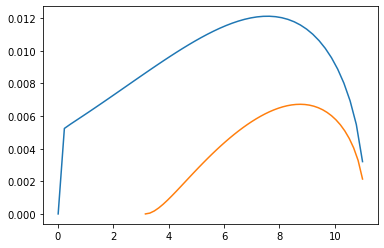

In [4]:
q2_mu = np.linspace(0.105**2, 11)
q2_tau = np.linspace(1.778**2, 11)


dGmu = dGammaLambdacmu(q2_mu)
dGtau = dGammaLambdactau(q2_tau)

plt.plot(q2_mu, dGmu)
plt.plot(q2_tau, dGtau)

## Loading Data

In [5]:
epsilon_pimu = 1/100

# 10noise
modes_dt = {0: {'mode': './features/IDEA_card_LambdacTauNu_10Noise.root', 'yields': 2.39e6}, 
            1: {'mode': './features/IDEA_card_LambdacMuNu_10Noise.root', 'yields': 4.79e7},
            2: {'mode': './features/RLambdacInclusive_10Noise.root', 'yields': 6.33e5},
            3: {'mode': './features/RLambdacCombCascade_10Noise.root', 'yields': 2.37e5},
            4: {'mode': './features/RLambdacMisID_10Noise.root', 'yields': epsilon_pimu*1.63e7}
           }

# 20noise
# modes_dt = {0: {'mode': './features/LambdacTauNu_20Noise.root', 'yields': 2.39e6}, 
#             1: {'mode': './features/LambdacMuNu_20Noise.root', 'yields': 4.76e7},
#             2: {'mode': './features/RLambdacInclusive_20Noise.root', 'yields': 6.32e5},
#             3: {'mode': './features/RLambdacCombCascade_20Noise.root', 'yields': 2.43e5},
#             4: {'mode': './features/RLambdacMisID_20Noise.root', 'yields': epsilon_pimu*1.65e7}
#            }



In [6]:
def load_train_test(modes_dt, size=0.5):
    np.random.seed(9)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    num_lt = []
    
    # loop over different modes
    for i, (k, v) in enumerate(modes_dt.items()):
        print('\rReading:', i)
        file = uproot.open(v['mode'])
#         df_i = file['t'].pandas.df()
        df_i = pd.DataFrame(np.array(file['t']['features'].array()))
        
        # shuffle the index for training and testing sets
        idx = df_i.index.tolist()
        np.random.shuffle(idx)
#         print(len(idx))
#         idx = idx[:100000]    # if too much data
        num_lt.append(len(idx))    

        df_i['target'] = i    # add the target label
        df_i['weight'] = v['yields']/len(idx)
        print(df_i['weight'][0])
        
        # cut according to the fraction
        cut = int(np.ceil(len(idx) * size))
        df_train_i = df_i.loc[idx[:cut]]
        df_test_i = df_i.loc[idx[cut:]]
        
        # Put to the global dataframs
        df_train = pd.concat([df_train, df_train_i])
        df_test = pd.concat([df_test, df_test_i])
    
    df_train.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    
    print('train size: {} ({:.2f}%); test size: {} ({:.2f}%)'.format(len(df_train), 100*len(df_train)/(len(df_train)+len(df_test)), len(df_test), 100*len(df_test)/(len(df_train)+len(df_test))))
    print('data points per mode: ',num_lt)
    return df_train, df_test

    

In [7]:
tr_te_split = 0.5
df_train, df_test = load_train_test(modes_dt, tr_te_split)
# make a copy
df_train_o, df_test_o = df_train.copy(), df_test.copy()

Reading: 0
382.6448927313481
Reading: 1
1144.0991711849429
Reading: 2
172.99808690899152
Reading: 3
172.36363636363637
Reading: 4
1.6962204462204462
train size: 74623 (50.00%); test size: 74620 (50.00%)
data points per mode:  [6246, 41867, 3659, 1375, 96096]


In [8]:
def relabel(x):
    if x == 0:    # tau
        return 0
    elif x == 1:    # mu
        return 1
    else:    # other bkg
        return 2

In [9]:
# relabel the, all bkg become one label
df_train['target'] = df_train['target'].apply(relabel)
df_test['target'] = df_test['target'].apply(relabel)

In [10]:
df_train.columns

Index(['iEvt', 'q2', 'miss2', 'pB', 'EB', 'pHc', 'EHc', 'pMu', 'EMu',
       'sMinMuBVert', 'sMinMuHcVert', 'sMinMuTr', 'sMinHcTr', 'sPVHc', 'mHcMu',
       'pPerp', 'mCorr', 'D0Max', 'DzMax', 'D0Sum', 'DzSum', 'ENeutral03',
       'ENeutral06', 'ENeutral03Hadron', 'ENeutral06Hadron',
       'ENeutral03Photon', 'ENeutral06Photon', 'ECharge03', 'ECharge06',
       'ECharge03PV', 'ECharge06PV', 'ECharge03DV', 'ECharge06DV', 'mK0SHcMu',
       'pK0S', 'q2True', 'miss2True', 'EBTrue', 'pBTrue', 'sMinMuHcVertTrue',
       'target', 'weight', 'pPerpHc'],
      dtype='object')

In [11]:
# features = ['q2', 'miss2', 
#             'pB', 'EB', 
#             'pHc', 'EHc', 
#             'pMu', 'EMu',
#             'sMinMuHcVert', 'sMinMuTr', 'sMinHcTr', 'sPVHc', 
#             'mHcMu',
#             'pPerp', 'mCorr', 
#             'D0Max', 'DzMax', 'D0Sum', 'DzSum', 
#             'ENeutral03','ENeutral06', 
#             'ENeutral03Hadron', 'ENeutral06Hadron',
#             'ENeutral03Photon', 'ENeutral06Photon', 
#             'ECharge03', 'ECharge06',
#             'ECharge03PV', 'ECharge06PV', 
#             'ECharge03DV', 'ECharge06DV', 
#             'mK0SHcMu', 'pK0S'
#            ]

features = ['q2', 'miss2', 
            'pB', 'EB', 
            'pHc', 'EHc', 
            'pMu', 'EMu',
            'sMinMuHcVert', 'sMinMuTr', 'sMinHcTr', 'sPVHc', 
            'mHcMu',
            'pPerp', 'mCorr', 
            'D0Max', 'DzMax', 'D0Sum', 'DzSum', 
            'ENeutral03','ENeutral06', 
            'ENeutral03Hadron', 'ENeutral06Hadron',
            'ENeutral03Photon', 'ENeutral06Photon', 
            'ECharge03', 'ECharge06',
            'ECharge03PV', 'ECharge06PV', 
            'ECharge03DV', 'ECharge06DV'
           ]

In [12]:
df_train[features] = df_train[features].replace([99999, -np.inf, np.inf], np.nan)
df_test[features] = df_test[features].replace([99999, -np.inf, np.inf], np.nan)

## Reweight by $q^2
$

In [13]:
# replace some values that have q2 larger than the max, by the max
df_train_o.loc[(df_train_o['q2True']>=11) & ((df_train_o.target==0) | (df_train_o.target==1)), 'q2True'] = 10.9
df_train.loc[(df_train['q2True']>=11) & ((df_train.target==0) | (df_train.target==1)), 'q2True'] = 10.9
df_test.loc[(df_test['q2True']>=11) & ((df_test.target==0) | (df_test.target==1)), 'q2True'] = 10.9

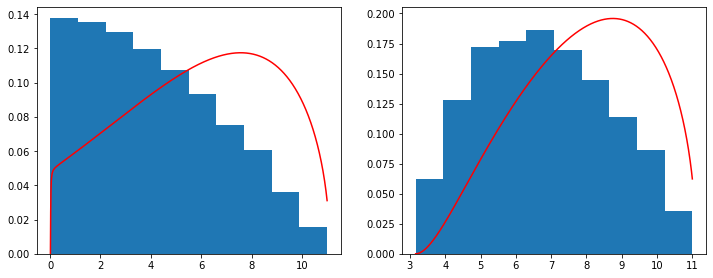

In [14]:
bins = 10

plt.figure(figsize=(12, 10))

# plot for mu
ax1 = plt.subplot(221)
range_mu = [0.105**2, 11]
ax1.hist(df_train_o[df_train_o.target==1]['q2True'], bins=bins, density=True, range=range_mu);
q2_mu = np.linspace(range_mu[0], range_mu[1], 1000, endpoint=True)
dGmu = dGammaLambdacmu(q2_mu)
ax1.plot(q2_mu, dGmu/np.trapz(dGmu, x=q2_mu), color='red', label='theoretical')

# plot for tau
ax2 = plt.subplot(222)
range_tau = [1.778**2, 11]
ax2.hist(df_train_o[df_train_o.target==0]['q2True'], bins=bins, density=True, range=range_tau);
q2_tau = np.linspace(range_tau[0], range_tau[1], 1000, endpoint=True)
dGtau = dGammaLambdactau(q2_tau)
ax2.plot(q2_tau, dGtau/np.trapz(dGtau, x=q2_tau), color='red', label='theoretical')

In [15]:
# reweight according to q^2
def find_m_rw(dGamma, df_train, target, range_, bin_num=10):
    # get the truth q2 array
    q2 = df_train[df_train.target==target]['q2True'].values    

    # Simulated bins
    hist, bins = np.histogram(a=q2, bins=bin_num, density=True, range=range_)
    width = np.diff(bins)
    center = (bins[:-1] + bins[1:]) / 2

    # Theoretical bins
    th_w = []
    for i in range(bin_num):
        dx = -(bins[i] - bins[i+1])/10
        x = np.linspace(bins[i], bins[i+1], 1000)
        y = dGamma(q2=x)
        th_w.append(np.trapz(y, dx=dx))    # Find area under curve
    # normalize
    th_w = th_w / sum(th_w) / width

    # reweighting
    m_rw = th_w / hist
    m_rw[np.isinf(m_rw)] = 0
    
    # return the values of each bin, and the bin bounds
    return m_rw, bins





# add the reweighting column to th dataframe
def add_m_rw(target, m_rw, bins, df):
    for i in range(len(bins)-1):
        df.loc[(df['target']==target) & (df['q2True']>=bins[i]) & (df['q2True']<bins[i+1]), 'm_rw'] = m_rw[i]
    
#     print(df.loc[df['target']==target, 'weight'].sum())
#     df.loc[df.target==target, 'm_rw'] = df.loc[df.target==target, 'm_rw']/(df.loc[df.target==target, 'm_rw'].sum())
    df.loc[df['target']==target, 'reweight'] = df.loc[df['target']==target, 'weight'] * df.loc[df.target==target, 'm_rw']
    df = df.drop(columns = ['m_rw'])
    
#     print(df.loc[df.target==target, 'reweight'].sum())
#     print()
    return df

In [16]:
# getting the weightings, and the bin bounds
m_rw_tau, bins_tau = find_m_rw(dGammaLambdactau, df_train_o, target=0, range_=range_tau)
m_rw_mu, bins_mu = find_m_rw(dGammaLambdacmu, df_train_o, target=1, range_=range_mu)

# duplicate the column for inputting to the function to get the reweight column
df_train_o['reweight'] = df_train_o['weight']
df_train['reweight'] = df_train['weight']
df_test['reweight'] = df_test['weight']

df_train_o = add_m_rw(target=0, m_rw=m_rw_tau, bins=bins_tau, df=df_train_o)
df_train_o = add_m_rw(target=1, m_rw=m_rw_mu, bins=bins_mu, df=df_train_o)

df_train = add_m_rw(target=0, m_rw=m_rw_tau, bins=bins_tau, df=df_train)
df_train = add_m_rw(target=1, m_rw=m_rw_mu, bins=bins_mu, df=df_train)

df_test = add_m_rw(target=0, m_rw=m_rw_tau, bins=bins_tau, df=df_test)
df_test = add_m_rw(target=1, m_rw=m_rw_mu, bins=bins_mu, df=df_test)


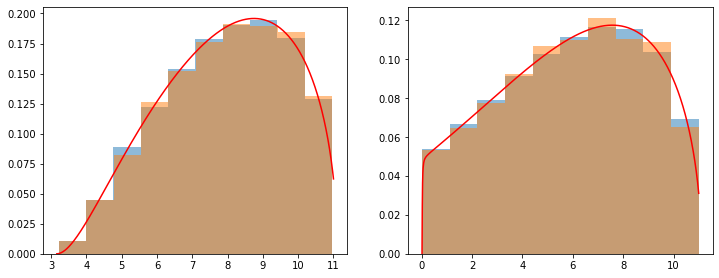

In [17]:
bins = 10

plt.figure(figsize=(12, 10))

# reweighted plot for tau, in testing 
ax1 = plt.subplot(221)
ax1.hist(df_train[df_train.target==0]['q2True'], bins=10, weights=df_train[df_train.target==0]['reweight'], density=True, alpha=0.5);
ax1.hist(df_test[df_test.target==0]['q2True'], bins=10, weights=df_test[df_test.target==0]['reweight'], density=True, alpha=0.5);
ax1.plot(q2_tau, dGtau/np.trapz(dGtau, x=q2_tau), color='red', label='theoretical')

# reweighted plot for mu, in testing 
ax2 = plt.subplot(222)
ax2.hist(df_train[df_train.target==1]['q2True'], bins=10, weights=df_train[df_train.target==1]['reweight'], density=True, alpha=0.5, range=[.105**2 ,11]);
ax2.hist(df_test[df_test.target==1]['q2True'], bins=10, weights=df_test[df_test.target==1]['reweight'], density=True, alpha=0.5, range=[.105**2 ,11]);
ax2.plot(q2_mu, dGmu/np.trapz(dGmu, x=q2_mu), color='red', label='theoretical')

## Saving Plots

In [18]:
df_plot = df_test

In [19]:
# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[0,50]

# ax1.hist(df_plot[(df_plot.target==0)]['EB'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0');
# ax1.hist(df_plot[(df_plot.target==1)]['EB'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \mu^+\nu$', alpha=0.5, color='C1');
# ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['EB'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5, color='C2');

# ax1.legend(loc=2, fontsize=20)
# ax1.hist(df_plot[(df_plot.target==0)]['EBTrue'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'true $\Lambda_b^0\to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0', linestyle='--');
# ax1.hist(df_plot[(df_plot.target==1)]['EBTrue'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'true $\Lambda_b^0\to \Lambda_c^- \mu^+\nu$', alpha=0.5, color='C1', linestyle='--');

# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$E_{\Lambda_b^0}$ [GeV]', fontsize=20)
# ax1.set_yticks([])

# f.savefig('./figures/LambdabE')
# # f.savefig('./figures/LambdabE_20noise')


X_mea0 = df_plot[(df_plot.target==0)]['EB']
X_mea1 = df_plot[(df_plot.target==1)]['EB']
X_tru0 = df_plot[(df_plot.target==0)]['EBTrue']
X_tru1 = df_plot[(df_plot.target==1)]['EBTrue']

X0 = X_mea0 - X_tru0
X1 = X_mea1 - X_tru1

W0 = df_plot[(df_plot.target==0)]['reweight']
W1 = df_plot[(df_plot.target==1)]['reweight']

X_Wmean0 = sum(X0 * W0) / sum(W0)
X_Wmean1 = sum(X1 * W1) / sum(W1)
print("E_B")

print("error for mu mode:  {:.2f}".format((sum((X0 - X_Wmean0)**2 * W0) / (sum(W0)*(len(W0)-1)/len(W0)))**0.5))
print("error for tau mode: {:.2f}".format((sum((X1 - X_Wmean1)**2 * W1) / (sum(W1)*(len(W1)-1)/len(W1)))**0.5))


E_B
error for mu mode:  1.34
error for tau mode: 1.61


In [20]:
# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[-10,13]

# ax1.hist(df_plot[(df_plot.target==0)]['q2'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0');
# ax1.hist(df_plot[(df_plot.target==1)]['q2'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \mu^+\nu$', alpha=0.5, color='C1');
# ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['q2'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5, color='C2');

# ax1.legend(loc=2, fontsize=20)
# ax1.hist(df_plot[(df_plot.target==0)]['q2True'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'$\Lambda_b^0\to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0', linestyle='--');
# ax1.hist(df_plot[(df_plot.target==1)]['q2True'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'$\Lambda_b^0\to \Lambda_c^- \mu^+\nu$', alpha=0.5, color='C1', linestyle='--');

# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$q^2$ [GeV$^2$]', fontsize=20)
# ax1.set_yticks([])

# # f.savefig('./figures/Lambdabq2')
# # f.savefig('./figures/Lambdabq2_20noise')


X_mea0 = df_plot[(df_plot.target==0)]['q2']
X_mea1 = df_plot[(df_plot.target==1)]['q2']
X_tru0 = df_plot[(df_plot.target==0)]['q2True']
X_tru1 = df_plot[(df_plot.target==1)]['q2True']

X0 = X_mea0 - X_tru0
X1 = X_mea1 - X_tru1

W0 = df_plot[(df_plot.target==0)]['reweight']
W1 = df_plot[(df_plot.target==1)]['reweight']

X_Wmean0 = sum(X0 * W0) / sum(W0)
X_Wmean1 = sum(X1 * W1) / sum(W1)

print("Q2")
print("error for tau mode:  {:.2f}".format((sum((X0 - X_Wmean0)**2 * W0) / (sum(W0)*(len(W0)-1)/len(W0)))**0.5))
print("error for mu mode: {:.2f}".format((sum((X1 - X_Wmean1)**2 * W1) / (sum(W1)*(len(W1)-1)/len(W1)))**0.5))


Q2
error for tau mode:  1.37
error for mu mode: 1.16


In [21]:
# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[-11,10]


# ax1.hist(df_plot[(df_plot.target==0)]['miss2'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \tau^+\nu$', alpha=0.5, color='C0');
# ax1.hist(df_plot[(df_plot.target==1)]['miss2'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \mu^+\nu$', alpha=0.5, color='C1');
# ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['miss2'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5, color='C2');

# ax1.legend(loc=2, fontsize=20)
# ax1.hist(df_plot[(df_plot.target==0)]['miss2True'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'true $\Lambda_b^0\to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0', linestyle='--');
# ax1.hist(df_plot[(df_plot.target==1)]['miss2True'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'true $\Lambda_b^0\to \Lambda_c^- \mu^+\nu$', alpha=0.5, color='C1', linestyle='--');

# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$m_{\rm miss}^2$ [GeV$^2$]', fontsize=20)
# ax1.set_yticks([])

# # f.savefig('./figures/Lambdabmiss2')
# # f.savefig('./figures/Lambdabmiss2_20noise')


X_mea0 = df_plot[(df_plot.target==0)]['miss2']
X_mea1 = df_plot[(df_plot.target==1)]['miss2']
X_tru0 = df_plot[(df_plot.target==0)]['miss2True']
X_tru1 = df_plot[(df_plot.target==1)]['miss2True']

X0 = X_mea0 - X_tru0
X1 = X_mea1 - X_tru1

W0 = df_plot[(df_plot.target==0)]['reweight']
W1 = df_plot[(df_plot.target==1)]['reweight']

X_Wmean0 = sum(X0 * W0) / sum(W0)
X_Wmean1 = sum(X1 * W1) / sum(W1)

print("miss2")
print("error for mu mode:  {:.2f}".format((sum((X0 - X_Wmean0)**2 * W0) / (sum(W0)*(len(W0)-1)/len(W0)))**0.5))
print("error for tau mode: {:.2f}".format((sum((X1 - X_Wmean1)**2 * W1) / (sum(W1)*(len(W1)-1)/len(W1)))**0.5))



miss2
error for mu mode:  1.62
error for tau mode: 1.68


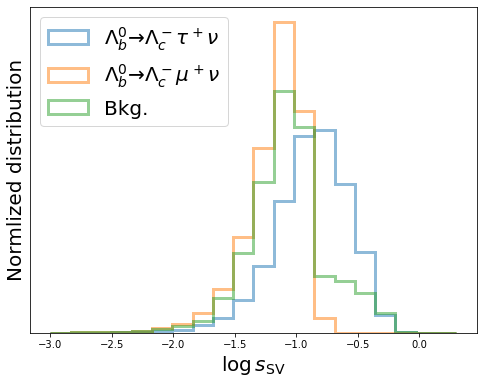

In [110]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[-3,0.3]


ax1.hist(np.log10(df_plot[(df_plot.target==0)]['sMinMuBVert']), weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \tau^+\nu$', alpha=0.5);
ax1.hist(np.log10(df_plot[(df_plot.target==1)]['sMinMuBVert']), weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \mu^+\nu$', alpha=0.5);
ax1.hist(np.log10(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['sMinMuBVert']), weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5);


# ax1.hist(np.log10(df_plot[(df_plot.target==0)]['sMinMuHcVertTrue']), weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, alpha=0.5, color='C0', linestyle='--');
# ax1.hist(np.log10(df_plot[(df_plot.target==1)]['sMinMuHcVertTrue']), weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, alpha=0.5, color='C1', linestyle='--');

ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$\log{s_{\rm SV}}$', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=2, fontsize=20)

f.savefig('./figures/Lambdablogssv')
# f.savefig('./figures/Lambdablogssv_20noise')


In [111]:
features

['q2',
 'miss2',
 'pB',
 'EB',
 'pHc',
 'EHc',
 'pMu',
 'EMu',
 'sMinMuHcVert',
 'sMinMuTr',
 'sMinHcTr',
 'sPVHc',
 'mHcMu',
 'pPerp',
 'mCorr',
 'D0Max',
 'DzMax',
 'D0Sum',
 'DzSum',
 'ENeutral03',
 'ENeutral06',
 'ENeutral03Hadron',
 'ENeutral06Hadron',
 'ENeutral03Photon',
 'ENeutral06Photon',
 'ECharge03',
 'ECharge06',
 'ECharge03PV',
 'ECharge06PV',
 'ECharge03DV',
 'ECharge06DV']

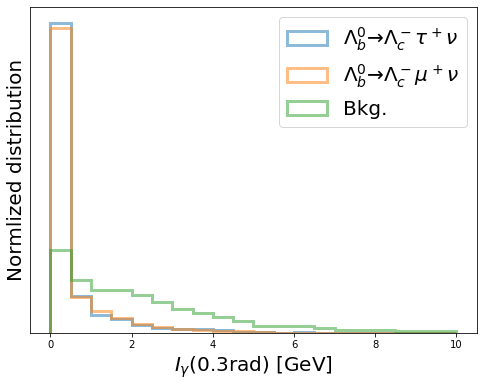

In [112]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[0,10]


ax1.hist(df_plot[(df_plot.target==0)]['ENeutral03Photon'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \tau^+\nu$', alpha=0.5);
ax1.hist(df_plot[(df_plot.target==1)]['ENeutral03Photon'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \mu^+\nu$', alpha=0.5);
ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['ENeutral03Photon'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5);
ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$I_\gamma(0.3\rm rad)$ [GeV]', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=1, fontsize=20)

f.savefig('./figures/Lambdabisolation')


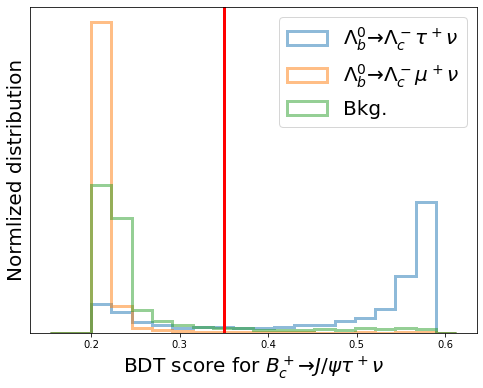

In [113]:

df_plot = df_bdt_test_s
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
pred0_max = df_plot[(df_plot.target==0)]['pred0'].max() 
pred0_min = df_plot[(df_plot.target==0)]['pred0'].min() 
pred0_diff = pred0_max - pred0_min
range_=[pred0_min - 0.1*pred0_max, pred0_max + 0.1*pred0_diff]
# print(range_)

ax1.hist(df_plot[(df_plot.target==0)]['pred0'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-\tau^+\nu$', alpha=0.5);
ax1.hist(df_plot[(df_plot.target==1)]['pred0'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-\mu^+\nu$', alpha=0.5);
ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['pred0'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5);
ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'BDT score for $B_c^+\to J/\psi \tau^+\nu$', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=1, fontsize=20)
ax1.axvline(c1, color='red', lw=3)

f.savefig('./figures/LambdabtauBDT')


In [114]:
d = xgbc1.get_booster().get_score()
dict(sorted(d.items(), key=lambda item: -1*item[1]))
# R(Jpsi)

{'miss2': 1489.0,
 'q2': 1122.0,
 'mHcMu': 1114.0,
 'pB': 1094.0,
 'sPVHc': 1001.0,
 'pHc': 988.0,
 'mCorr': 842.0,
 'sMinMuHcVert': 841.0,
 'pMu': 840.0,
 'pPerp': 681.0,
 'ENeutral03Photon': 515.0,
 'ENeutral06': 491.0,
 'ENeutral06Photon': 483.0,
 'ENeutral03': 459.0,
 'sMinMuTr': 344.0,
 'ENeutral06Hadron': 344.0,
 'ECharge06PV': 278.0,
 'ECharge06': 273.0,
 'sMinHcTr': 268.0,
 'ENeutral03Hadron': 223.0,
 'ECharge03': 218.0,
 'ECharge03PV': 183.0,
 'ECharge06DV': 129.0,
 'ECharge03DV': 127.0,
 'D0Max': 98.0,
 'DzMax': 91.0,
 'EHc': 75.0,
 'DzSum': 69.0,
 'D0Sum': 65.0}

In [115]:
df_test['sMinMuHcVert']

0        0.028694
1        0.186322
2        0.024403
3        0.007119
4        0.095647
           ...   
80933    0.013411
80934    0.035840
80935    0.076256
80936    0.009792
80937    0.450642
Name: sMinMuHcVert, Length: 80938, dtype: float32

In [116]:
# df_plot = df_test.loc[df_test_o[df_test_o['target']!=4].index]
df_plot = df_test.loc[df_test_o[df_test_o['target']!=4].index]
df_plot = df_test
